In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
uci = pd.read_csv('uciccd.csv')
uci = uci[1:]
uci = uci.iloc[: , 1:]
uci.head()
X = uci.iloc[:, :23]
y = uci.iloc[:, 23]
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)


In [219]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
lr.coef_

array([[-0.10507232, -0.0539305 , -0.07662616, -0.08521105,  0.07293996,
         0.65909535,  0.09159694,  0.06447694,  0.02997006,  0.04921681,
         0.01456986, -0.42103502,  0.20997716,  0.13964198, -0.03169405,
         0.02158196, -0.00903044, -0.17925336, -0.26017771, -0.09355465,
        -0.04469032, -0.03633583, -0.04476397]])

In [220]:
from tabulate import tabulate
cols  = np.asarray(pd.read_csv('uciccd.csv').iloc[[0]])
cols = list(cols[0])[1:24]
vals = list(lr.coef_[0])
cv = {}
for i in range(len(cols)):
    cv[cols[i]] = vals[i]
cv = sorted(cv.items(), key=lambda x:abs(x[1]), reverse=True)
cv = [list(i) for i in cv]
print(tabulate(cv, headers=['Variable', 'Coefficient'], tablefmt='orgtbl'))





| Variable   |   Coefficient |
|------------+---------------|
| PAY_0      |    0.659095   |
| BILL_AMT1  |   -0.421035   |
| PAY_AMT2   |   -0.260178   |
| BILL_AMT2  |    0.209977   |
| PAY_AMT1   |   -0.179253   |
| BILL_AMT3  |    0.139642   |
| LIMIT_BAL  |   -0.105072   |
| PAY_AMT3   |   -0.0935547  |
| PAY_2      |    0.0915969  |
| MARRIAGE   |   -0.085211   |
| EDUCATION  |   -0.0766262  |
| AGE        |    0.07294    |
| PAY_3      |    0.0644769  |
| SEX        |   -0.0539305  |
| PAY_5      |    0.0492168  |
| PAY_AMT6   |   -0.044764   |
| PAY_AMT4   |   -0.0446903  |
| PAY_AMT5   |   -0.0363358  |
| BILL_AMT4  |   -0.0316941  |
| PAY_4      |    0.0299701  |
| BILL_AMT5  |    0.021582   |
| PAY_6      |    0.0145699  |
| BILL_AMT6  |   -0.00903044 |


[]

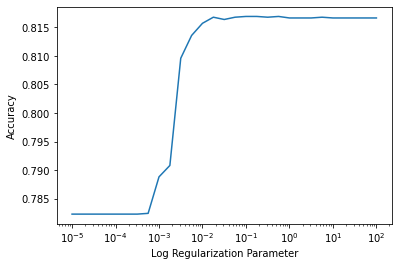

In [221]:
crange = np.power(10, np.arange(-5.0, 2.25, 0.25))
fits_l1 = []
for c in crange:
    fits_l1.append(LogisticRegression(C=c, max_iter=100, penalty="l1", solver="liblinear").fit(X_train, y_train))
accuracy_l1 = [f.score(X_test, y_test) for f in fits_l1]
plt.plot(crange, accuracy_l1, label="l1")
plt.xlabel('Log Regularization Parameter')
plt.ylabel('Accuracy')
plt.semilogx()

In [222]:
i = accuracy_l1.index(max(accuracy_l1))
print(i)

16


In [223]:
len(crange)

29

[]

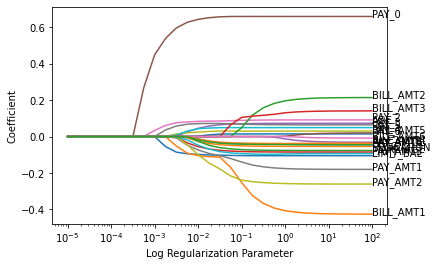

In [224]:
coefs = {}
for i in fits_l1:
    for j in range(len(i.coef_[0])):
        if cols[j] not in coefs:
            coefs[cols[j]] = [i.coef_[0][j]]
        else:
            coefs[cols[j]].append(i.coef_[0][j])

for k in coefs.keys():
    plt.plot(crange, coefs[k], label=k)
    plt.text(crange[28], coefs[k][28], k)
plt.xlabel('Log Regularization Parameter')
plt.ylabel('Coefficient')
plt.semilogx()


In [225]:
count = 0
for k in coefs.keys():
    if coefs[k][15] > 0:
        count+=1 
print(count)
print(len(coefs.keys()))
    

8
23


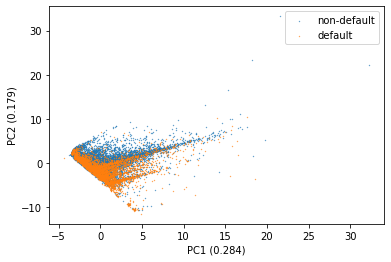

In [226]:
from sklearn.decomposition import PCA
pca = PCA()
X_p = pca.fit_transform(X_train)
y_train = np.asarray(y_train)
plt.scatter(X_p[np.where(y_train=='0'), 0], X_p[np.where(y_train=='0'), 1], s=0.1, label='non-default')
plt.scatter(X_p[np.where(y_train=='1'), 0], X_p[np.where(y_train=='1'), 1], s=0.1, label ='default')
plt.xlabel('PC1 ('+str(round(pca.explained_variance_ratio_[0],3))+')')
plt.ylabel('PC2 ('+str(round(pca.explained_variance_ratio_[1],3))+')')
plt.legend()

In [227]:
lst = []
for i, c in enumerate(pca.explained_variance_ratio_):
    lst.append(['PC'+str(i+1), c])
print(tabulate(lst, headers=['Principal Component', 'Variance Ratio'], tablefmt='orgtbl'))

| Principal Component   |   Variance Ratio |
|-----------------------+------------------|
| PC1                   |       0.283721   |
| PC2                   |       0.179      |
| PC3                   |       0.0681206  |
| PC4                   |       0.0638944  |
| PC5                   |       0.0444974  |
| PC6                   |       0.0419345  |
| PC7                   |       0.039763   |
| PC8                   |       0.0385402  |
| PC9                   |       0.0367642  |
| PC10                  |       0.0334406  |
| PC11                  |       0.0320946  |
| PC12                  |       0.0298479  |
| PC13                  |       0.0249733  |
| PC14                  |       0.0227492  |
| PC15                  |       0.0175197  |
| PC16                  |       0.0113072  |
| PC17                  |       0.0108352  |
| PC18                  |       0.0082312  |
| PC19                  |       0.00571626 |
| PC20                  |       0.00309585 |
| PC21    

[]

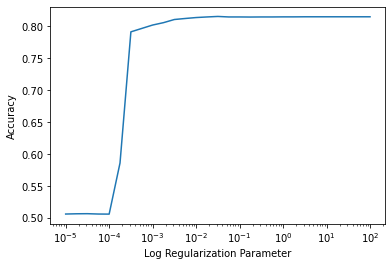

In [233]:
data = uci
X = data.iloc[:, :23]
y = data.iloc[:, 23]
scaler = StandardScaler()
scaler.fit(X)
pca = PCA()
X = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)
crange = np.power(10, np.arange(-5.0, 2.25, 0.25))
fits_l1 = []
for c in crange:
    fits_l1.append(LogisticRegression(C=c, max_iter=100, penalty="l1", solver="liblinear").fit(X_train, y_train))
accuracy_l1 = [f.score(X_test, y_test) for f in fits_l1]
plt.plot(crange, accuracy_l1, label="l1")
plt.xlabel('Log Regularization Parameter')
plt.ylabel('Accuracy')
plt.semilogx()


In [234]:
i = accuracy_l1.index(max(accuracy_l1))
print(crange[i])

0.03162277660168379


[]

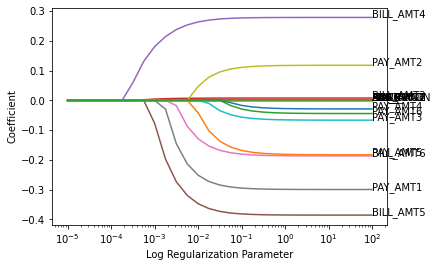

In [235]:
cols  = np.asarray(pd.read_csv('uciccd.csv').iloc[[0]])
cols = list(cols[0])[1:24]
vals = list(lr.coef_[0])
coefs = {}
for i in fits_l1:
    for j in range(len(i.coef_[0])):
        if cols[j] not in coefs:
            coefs[cols[j]] = [i.coef_[0][j]]
        else:
            coefs[cols[j]].append(i.coef_[0][j])

for k in coefs.keys():
    plt.plot(crange, coefs[k], label=k)
    plt.text(crange[28], coefs[k][28], k)
plt.xlabel('Log Regularization Parameter')
plt.ylabel('Coefficient')
plt.semilogx()

In [237]:
count = 0
for k in coefs.keys():
    if coefs[k][20] > 0:
        count+=1 
print(count)
    

8
